In [1]:
cd /glade/work/joyceyang

/glade/work/joyceyang


In [2]:
# Imports 
%matplotlib inline
import os, glob
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd  
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime 
from datetime import date, datetime, timedelta

lat_grid = np.load('lat_grid.npy')
lon_grid = np.load('lon_grid.npy')

In [3]:
%%time
class Graph(): 
    def Plot(title, figname, variable):
        fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
        ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
        ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
        ax.set_global() # set map extent to global 
        ax.coastlines() # add in coastlines 
        plt.tight_layout()
        
        c = variable - 273 # convert to Celsius 
        
        plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker='s')

        plt.title(title, size=20)
        cbar = plt.colorbar(shrink=0.6) # create colorbar 
        cbar.set_label('Temperature (C)    ', rotation=270)

        plt.savefig(figname)

        
        
# Open dataset 
def open_file_R(file, landunit=1): 
    nc = xr.open_dataset(file)
    tsa = nc.TSA.squeeze().where(nc1.pfts1d_itype_lunit==landunit) # change landunit
    wt = nc.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==landunit)
    tsa_cube = np.full((288,192,15), np.nan)
    wt_cube = np.full((288,192,15), np.nan)

    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa[vmask].values
            w = wt[vmask].values
            for k in range(len(v)):
                tsa_cube[i-1,j-1,k] = v[k]
                wt_cube[i-1,j-1,k] = w[k]
    
    tsa_grid = np.nansum((np.multiply(tsa_cube, wt_cube)), axis=2)
    
    foo = xr.DataArray(data=tsa_grid, 
                   coords={"lat": (["x","y"], lat_grid), "lon": (["x","y"], lon_grid)}, 
                   dims=["x","y"], 
                    name='TSA_R') 
    print(nc.TSA.coords['time'].values)

    return foo



# Open dataset (urban)
def open_file_U(file): 
    nc = xr.open_dataset(file)
   

    # Urban TBD Grid 
    tsa1 = nc.TSA.squeeze().where(nc.pfts1d_itype_lunit==7) # change landunit
    wt1 = nc.pfts1d_wtlunit.where(nc.pfts1d_itype_lunit==7)
    
    tsa_cube1 = np.full((288,192,15), np.nan)
    wt_cube1 = np.full((288,192,15), np.nan)

    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa1.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa1[vmask].values
            w = wt1[vmask].values
            for k in range(len(v)):
                tsa_cube1[i-1,j-1,k] = v[k]
                wt_cube1[i-1,j-1,k] = w[k]
    
    tsa_grid1 = np.nansum((np.multiply(tsa_cube1, wt_cube1)), axis=2)
    print("Urban TBD grid done") # TODO temporary
    
    
    # Urban HD Grid 
    tsa2 = nc.TSA.squeeze().where(nc.pfts1d_itype_lunit==8)
    wt2 = nc.pfts1d_wtlunit.where(nc.pfts1d_itype_lunit==8)
    
    tsa_cube2 = np.full((288,192,15), np.nan)
    wt_cube2 = np.full((288,192,15), np.nan)
    
    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa2.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa2[vmask].values
            w = wt2[vmask].values
            for k in range(len(v)):
                tsa_cube2[i-1,j-1,k] = v[k]
                wt_cube2[i-1,j-1,k] = w[k]
    
    tsa_grid2 = np.nansum((np.multiply(tsa_cube2, wt_cube2)), axis=2)
    print("Urban HD grid done") # TODO temporary
    
    
    #Urban MD Grid 
    tsa3 = nc.TSA.squeeze().where(nc.pfts1d_itype_lunit==9)
    wt3 = nc.pfts1d_wtlunit.where(nc.pfts1d_itype_lunit==9)
    
    tsa_cube3 = np.full((288,192,15), np.nan)
    wt_cube3 = np.full((288,192,15), np.nan)
    
    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa3.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa3[vmask].values
            w = wt3[vmask].values
            for k in range(len(v)):
                tsa_cube3[i-1,j-1,k] = v[k]
                wt_cube3[i-1,j-1,k] = w[k]
    
    tsa_grid3 = np.nansum((np.multiply(tsa_cube3, wt_cube3)), axis=2)
    print("Urban MD grid done") # TODO temporary
    
    
    # Combine all cubes together into one grid 
    
    # TBD landunit weight in grid cell 
    TBD = nc.land1d_wtgcell.where(nc.land1d_ityplunit==7)
    wtlunit_gcell_grid_TBD = np.full((288,192), float("NaN")) # should I add in third dimension of 1

    for i in range(1,289): 
        for j in range(1,193):
            vmask = (np.isnan(TBD.where(nc.land1d_ixy==i).where(nc.land1d_jxy==j)) == False)
            v = TBD[vmask].values
            if v.size == 0: 
                v = float("NaN")
            wtlunit_gcell_grid_TBD[i-1,j-1] = v
            
    print("TBD weight grid done") # TODO temporary
    
    # HD landunit weight in grid cell 
    HD = nc.land1d_wtgcell.where(nc.land1d_ityplunit==8)
    wtlunit_gcell_grid_HD = np.full((288,192), float("NaN")) 

    for i in range(1,289): 
        for j in range(1,193):
            vmask = (np.isnan(HD.where(nc.land1d_ixy==i).where(nc.land1d_jxy==j)) == False)
            v = HD[vmask].values
            if v.size == 0: 
                v = float("NaN")
            wtlunit_gcell_grid_HD[i-1,j-1] = v
            
    print("HD weight grid done") # TODO temporary
    
    # MD landunit weight in grid cell 
    MD = nc.land1d_wtgcell.where(nc.land1d_ityplunit==9)
    wtlunit_gcell_grid_MD = np.full((288,192), float("NaN")) 

    for i in range(1,289): 
        for j in range(1,193):
            vmask = (np.isnan(MD.where(nc.land1d_ixy==i).where(nc.land1d_jxy==j)) == False)
            v = MD[vmask].values
            if v.size == 0: 
                v = float("NaN")
            wtlunit_gcell_grid_MD[i-1,j-1] = v
            
    print("MD weight grid done") # TODO temporary
    
    
    x = np.multiply(tsa_grid1, wtlunit_gcell_grid_TBD)
    y = np.multiply(tsa_grid2, wtlunit_gcell_grid_HD)
    z = np.multiply(tsa_grid3, wtlunit_gcell_grid_MD)
    
    print("Created three intermediate grids ")

    num = np.nansum((x,y,z), axis=0)
    den = np.nansum((wtlunit_gcell_grid_TBD,wtlunit_gcell_grid_HD,wtlunit_gcell_grid_MD), axis=0)
    
    print("Created num and den for urban_tot")

    urban_tot = num/den
    
    foo = xr.DataArray(data=urban_tot, 
                   coords={"lat": (["x","y"], lat_grid), "lon": (["x","y"], lon_grid)}, 
                   dims=["x","y"], 
                    name='TSA_U') 
    
    #boo = xr.DataArray(data=urban_tot, 
                      #coords=)
    print(nc.TSA.coords['time'].values)

    return foo



# File Name Generator 
def filename_generator(season, start_date, end_date):
    if season == 'winter':
        months = ['-01', '-02', '-12']
    elif season == 'summer': 
        months = ['-06', '-07', '-08']
    else: 
        print('give a season')
    
    prefix = 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.'
    
    years = list(str(i) for i in range(start_date, end_date+1))
    suffix = '.nc'
    filenames = [prefix+year+month+suffix for month in months for year in years]
    return filenames     



# Generate list of dates
def date_generator(season,start,end):
    dates = []
    
    if season == 'winter': 
        month = [1, 2, 12]
    if season == 'summer':
        month = [6, 7, 8]

    year = start 
    while year <= end: 
        for i in month:
            dates.append(datetime(year,i,1))
        year += 1

    return dates 

CPU times: user 31 µs, sys: 8 µs, total: 39 µs
Wall time: 41.5 µs


# Urban

# DJF

In [4]:
filenames = filename_generator(season='winter',start_date=2100,end_date=2100)
dates = date_generator("winter", 2100, 2100)
print(filenames)
print(dates)

['CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2100-01.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2100-02.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2100-12.nc']
[datetime.datetime(2100, 1, 1, 0, 0), datetime.datetime(2100, 2, 1, 0, 0), datetime.datetime(2100, 12, 1, 0, 0)]


In [5]:
%%time

i = 0
tosave = 'TSA_U_2100.01'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2100, 2, 1, 0, 0, 0, 0, 3, 32)]
CPU times: user 38min 12s, sys: 95.5 ms, total: 38min 12s
Wall time: 38min 13s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [6]:
%%time

i = 1
tosave = 'TSA_U_2100.02'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2100, 3, 1, 0, 0, 0, 0, 3, 60)]
CPU times: user 38min 5s, sys: 60 ms, total: 38min 5s
Wall time: 38min 5s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [7]:
%%time

i = 2
tosave = 'TSA_U_2100.12'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2101, 1, 1, 0, 0, 0, 0, 1, 1)]
CPU times: user 38min 34s, sys: 112 ms, total: 38min 34s
Wall time: 38min 34s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [8]:
tosave = 'TSA_U_2100_DJF' # 

nc0 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2100.01.nc')
nc1 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2100.02.nc')
nc2 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2100.12.nc')
ds = xr.concat([nc0, nc1, nc2], dim='time')

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds.to_netcdf(dataDIR)

<xarray.DataArray 'time' ()>
array('2100-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2100-01-01


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


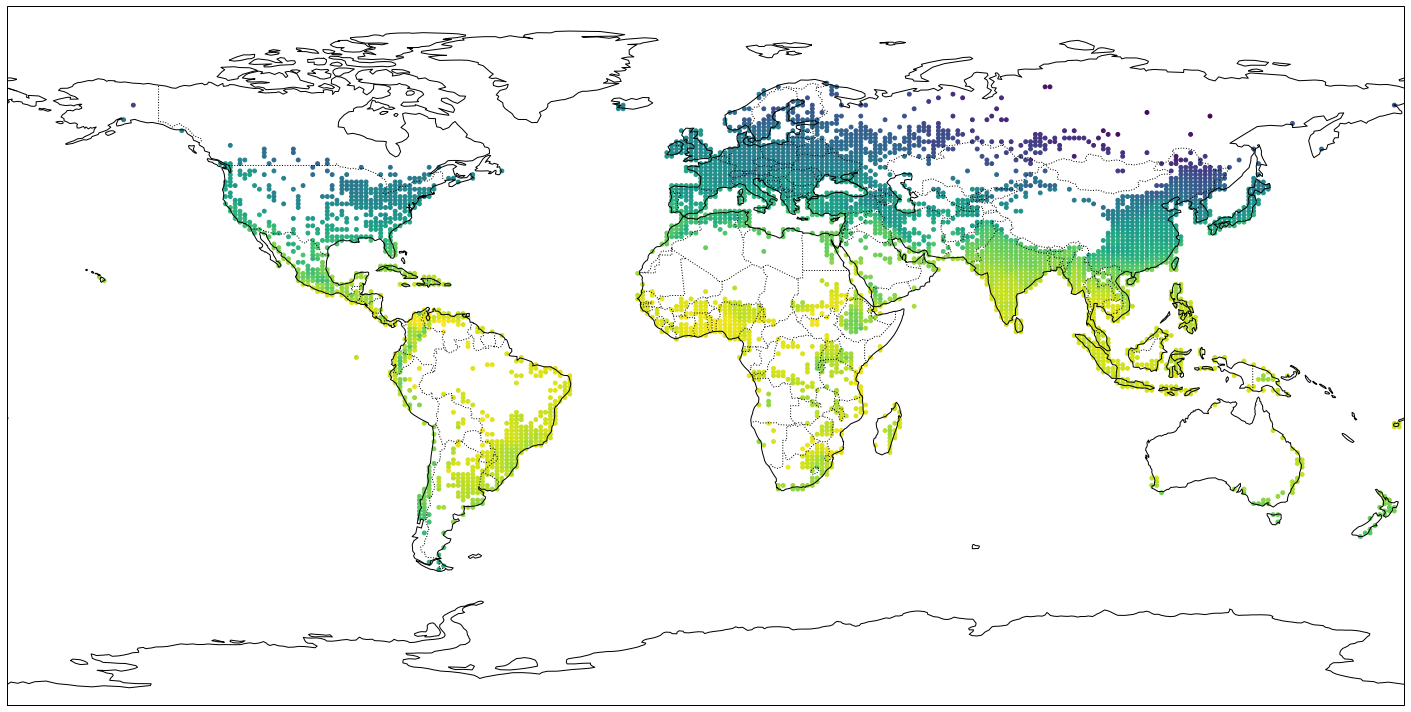

In [9]:
tosave = 'TSA_U_2100_DJF' # 

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'

nc = xr.open_dataset(dataDIR)
print(nc.time[0])

fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
ax.set_global() # set map extent to global 
ax.coastlines() # add in coastlines 
plt.tight_layout()

c = nc.TSA_U.mean(dim='time') - 273 # convert to Celsius 

plt.scatter(nc.TSA_U.lon, nc.TSA_U.lat, c=c, transform=ccrs.PlateCarree(), s=15, marker='o')

# JJA

In [4]:
filenames = filename_generator(season='summer',start_date=2100,end_date=2100)
dates = date_generator("summer", 2100, 2100)
print(filenames)
print(dates)

['CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2100-06.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2100-07.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2100-08.nc']
[datetime.datetime(2100, 6, 1, 0, 0), datetime.datetime(2100, 7, 1, 0, 0), datetime.datetime(2100, 8, 1, 0, 0)]


In [5]:
%%time

i = 0
tosave = 'TSA_U_2100.06'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2100, 7, 1, 0, 0, 0, 0, 6, 182)]
CPU times: user 42min 6s, sys: 2.32 s, total: 42min 9s
Wall time: 42min 9s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [5]:
%%time

i = 1
tosave = 'TSA_U_2100.07'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2100, 8, 1, 0, 0, 0, 0, 2, 213)]
CPU times: user 41min 46s, sys: 1.12 s, total: 41min 47s
Wall time: 41min 48s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [5]:
%%time

i = 2
tosave = 'TSA_U_2100.08'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2100, 9, 1, 0, 0, 0, 0, 5, 244)]
CPU times: user 43min 57s, sys: 855 ms, total: 43min 58s
Wall time: 43min 59s


/ncar/usr/jupyterhub/envs/pangeo-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [6]:
tosave = 'TSA_U_2100_JJA' # 

nc0 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2100.06.nc') #
nc1 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2100.07.nc') # 
nc2 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2100.08.nc') # 
ds = xr.concat([nc0, nc1, nc2], dim='time')

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds.to_netcdf(dataDIR)

<xarray.DataArray 'time' ()>
array('2100-06-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2100-06-01


/glade/u/home/joyceyang/.local/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


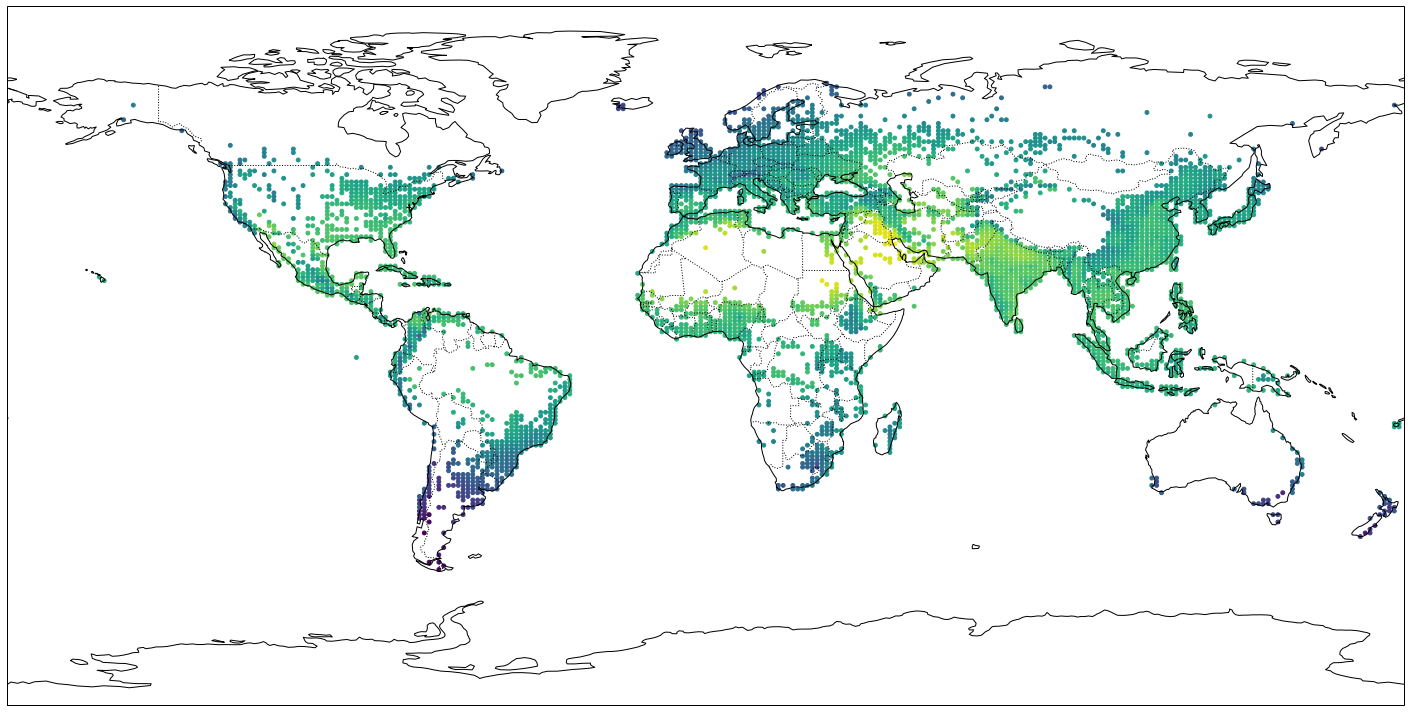

In [7]:
tosave = 'TSA_U_2100_JJA' # 

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'

nc = xr.open_dataset(dataDIR)
print(nc.time[0])

fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
ax.set_global() # set map extent to global 
ax.coastlines() # add in coastlines 
plt.tight_layout()

c = nc.TSA_U.mean(dim='time') - 273 # convert to Celsius 

plt.scatter(nc.TSA_U.lon, nc.TSA_U.lat, c=c, transform=ccrs.PlateCarree(), s=15, marker='o')